
# Example: Linear Regression using NumPy

This is example of applying linear regression for a column in a data frame. Here we are using London weather data from 1956 to 2019 to estimate if the weather in July is increasing. (July is usually the hottest month.)

Source: [Regression Plots with Pandas and Numpy](https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f)

---



## Dependencies

In [137]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
Plot regression training data along with linear fit.

## Get Source Data

In [138]:
# grab london weather data
weather = pd.read_csv('https://raw.githubusercontent.com/alanjones2/dataviz/master/londonweather.csv')
weather[weather.Month == 7].head()

,Year,Month,Tmax,Tmin,Rain,Sun
6,1957,7,22.5,13.8,87.0,152.3
18,1958,7,21.7,12.9,51.9,190.5
30,1959,7,24.7,13.3,86.5,276.9
42,1960,7,20.1,12.4,67.2,139.7
54,1961,7,22.1,12.1,26.2,180.0


Get a subset of the data, namely just the month of July, as this is typically the hottest month for London.

In [139]:
# summer month in London is July
july = weather.query('Month == 7').loc[:, ['Year', 'Tmax']]
july.head()


,Year,Tmax
6,1957,22.5
18,1958,21.7
30,1959,24.7
42,1960,20.1
54,1961,22.1


Plot the maximum temperatures for July since 1957.

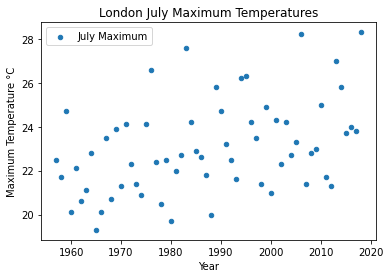

In [140]:
# uses the 'july' dataframe to plot by column name
ax = july.plot(x='Year', y='Tmax', label='July Maximum', kind='scatter')
ax.set_xlabel('Year')
ax.set_ylabel('Maximum Temperature °C')
ax.set_title('London July Maximum Temperatures')
plt.show()

Fit a linear regression (degree = 1) to year index versus maximum temperature:

First, build the temperature model.

In [141]:
# least squares polynomial fit (returns polynomial coefficients)
pc = np.polyfit(x = july['Year'], y = july['Tmax'], deg = 1)
pc

array([ 4.80874317e-02, -7.24963511e+01])

In [142]:
# convert to pandas 1-dimensional polynomial so we can fit to dataframe
f = np.poly1d(pc)
f

poly1d([ 4.80874317e-02, -7.24963511e+01])

Copy July as we are about to append the predictions to it.

In [143]:
july_pred = july[['Year', 'Tmax']].copy(deep=True)
july_pred.tail()

,Year,Tmax
690,2014,25.8
702,2015,23.7
714,2016,24.0
726,2017,23.8
738,2018,28.3


Insert regression data to the end of the copied data frame.

In [144]:
# add new column containing linear regression polynomial
july_pred['Tpred'] = f(july['Year'])
july_pred.tail()

,Year,Tmax,Tpred
690,2014,25.8,24.351736
702,2015,23.7,24.399824
714,2016,24.0,24.447911
726,2017,23.8,24.495999
738,2018,28.3,24.544086


Plot the results by:

- plotting the temperature versus year index
- adding the regression line (in red)

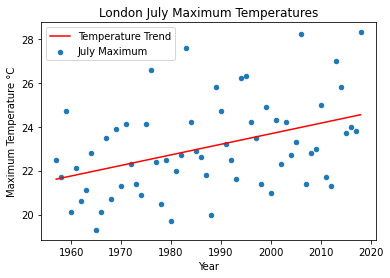

In [145]:
ax = plt.gca()    # get current axes
july_pred.plot(kind='scatter', x='Year', y='Tmax', label='July Maximum', ax=ax)
july_pred.plot('Year', 'Tpred', color='red', label='Temperature Trend', ax=ax)
plt.title('London July Maximum Temperatures')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature °C')
plt.legend()
plt.show()

From this graph it is easy to see the steady July maximum temperature increase from 1956 till 2019.

### Temperatures beyond 2020?

What are the expected temperatures beyond 2020?

In [146]:
# extend years to 2040
july_pred = pd.DataFrame(data=np.append(july.Year, np.arange(2020, 2040 + 1)), columns=['Year'])

In [147]:
# extend temperatures to 2040 (fill with Nan) and add to dataframe
july_pred['Tmax'] = pd.Series(np.append(july.Tmax, np.full(20, None)))

Add temperature predictions to dataframe.

In [148]:
# make future predictions (uses prediction function from above)
july_pred['Tpred'] = pd.Series(f(july_pred.Year))

Plot temperature predictions:

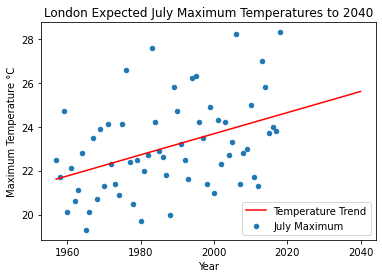

In [149]:
ax = plt.gca()  # get current axes
july_pred.plot(kind='scatter', x='Year', y='Tmax', label='July Maximum', ax=ax)
july_pred.plot('Year', 'Tpred', color='red', label='Temperature Trend', ax=ax)
plt.title('London Expected July Maximum Temperatures to 2040')
plt.xlabel('Year')
plt.ylabel('Maximum Temperature °C')
plt.legend()
plt.show()